# Surprise Housing Assignment

#### Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


## Objective

####  To model the price of houses (dependent variable) given a set of attributes (predictor variables).

This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


- Determine the significant variabes in predicting the price of a house
- Finding how well those variables describe the price of a house
- Determine optimal values of lambda for ridge and lasso regression

## Approach:
- Step 1 : Data Undestanding and Exploration
- Step 2 : Data Cleaning
- Step 3 : Data Preparation
- Step 4 : Model Building 
- Step 5 : Evaluation of various models
- Step 6 : Results and Recommendations

#### Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')


## Step 1 : Data Understanding and Exploration          

In [3]:
# Reading csv file

hsg_data = pd.read_csv("train.csv")

In [4]:
hsg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

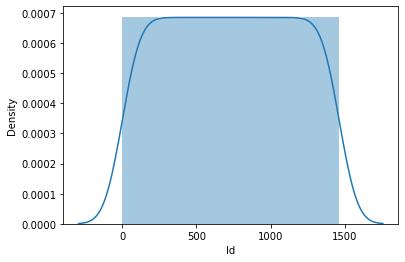

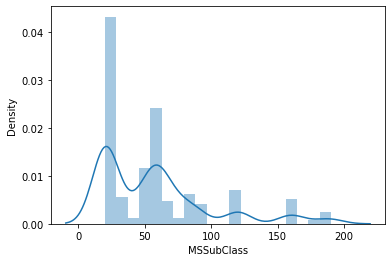

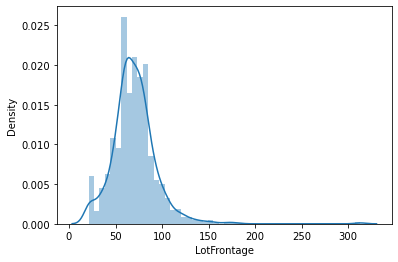

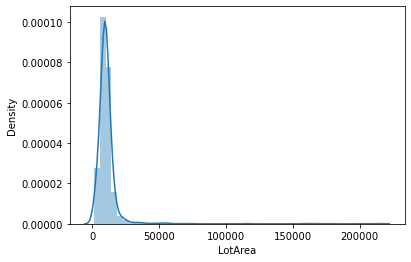

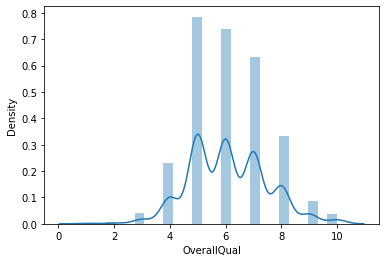

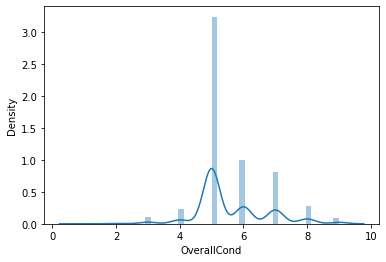

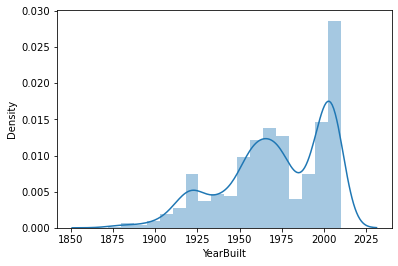

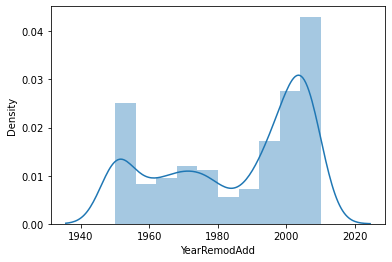

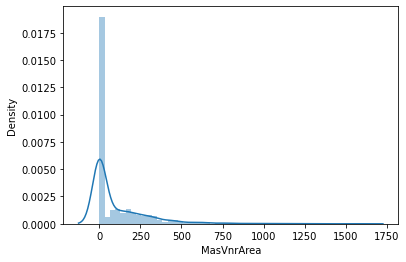

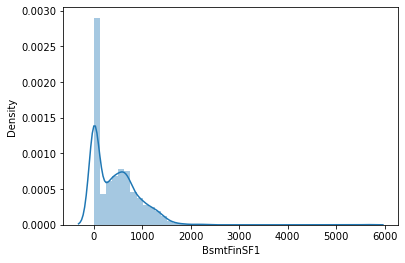

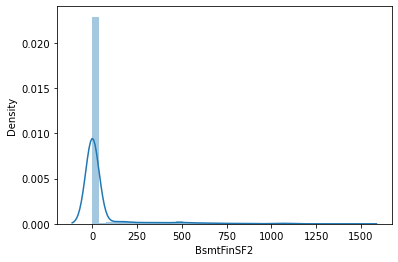

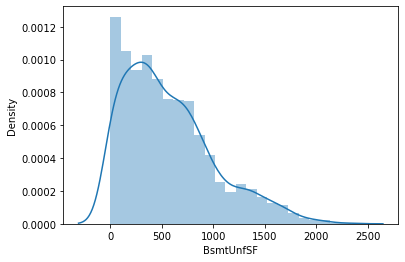

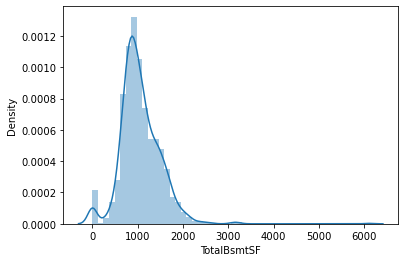

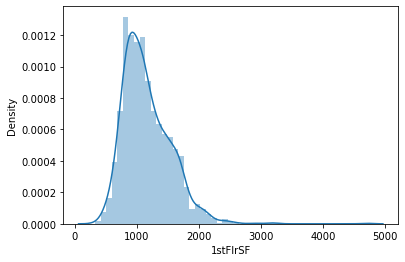

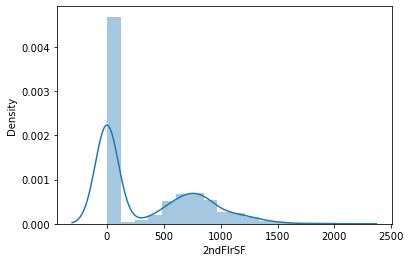

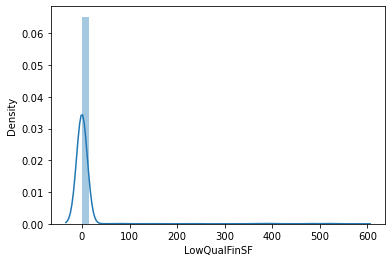

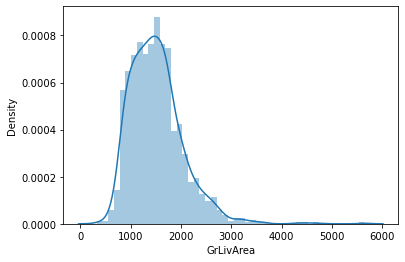

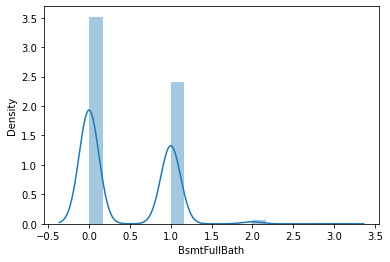

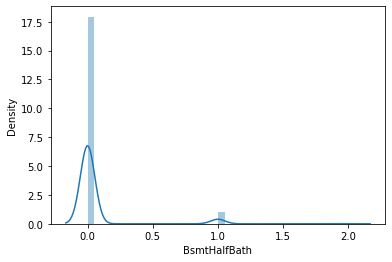

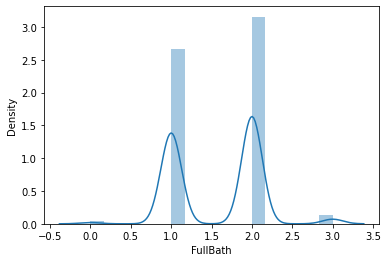

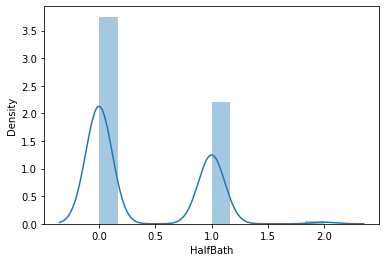

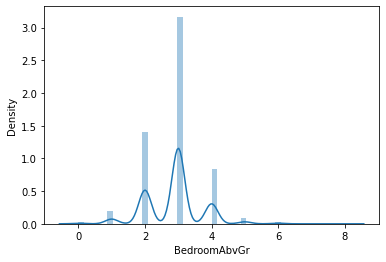

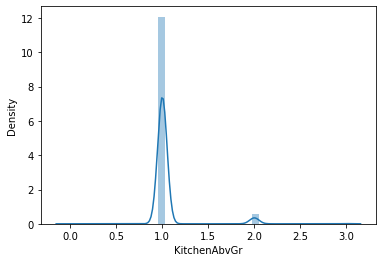

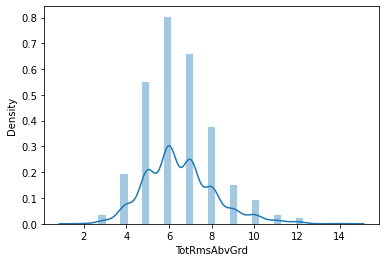

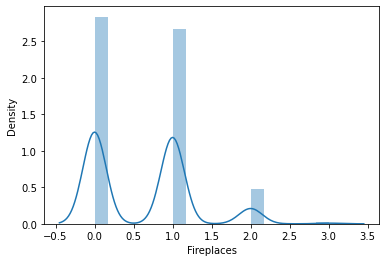

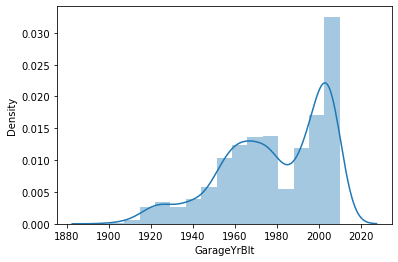

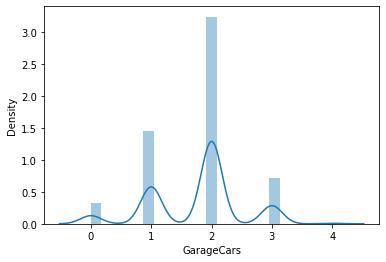

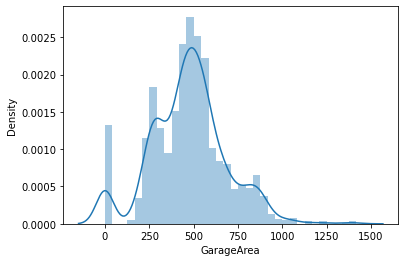

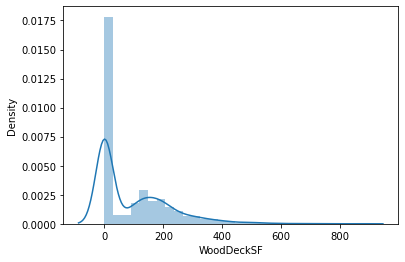

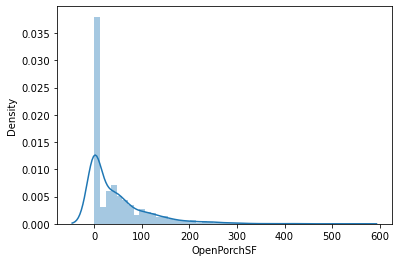

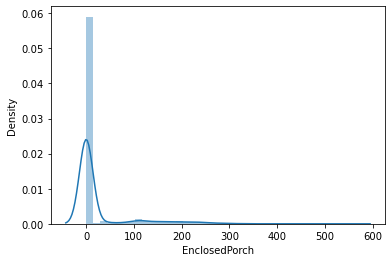

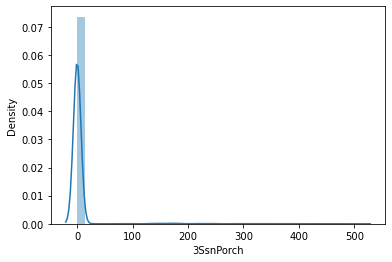

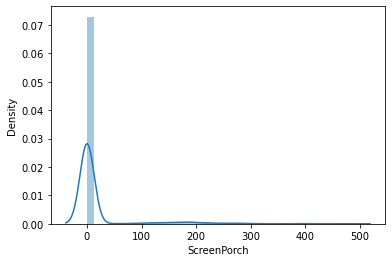

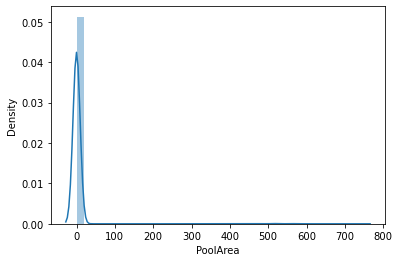

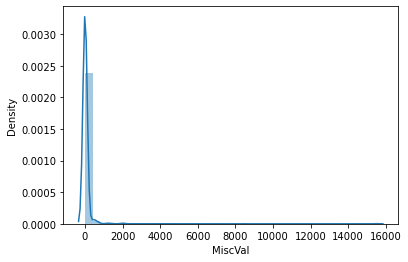

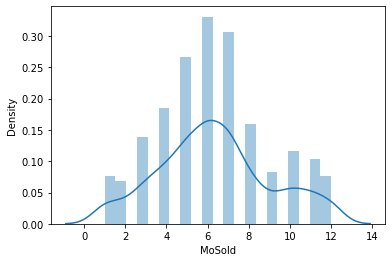

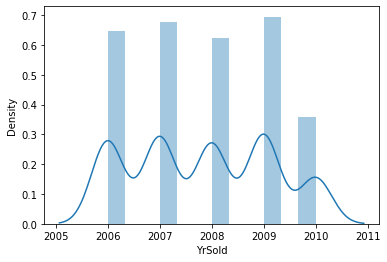

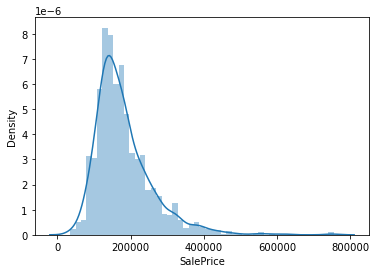

In [5]:
# Visualizing numeric data

for i in list(hsg_data.select_dtypes(include=np.number).columns):
    sns.distplot(hsg_data[i])
    plt.show()

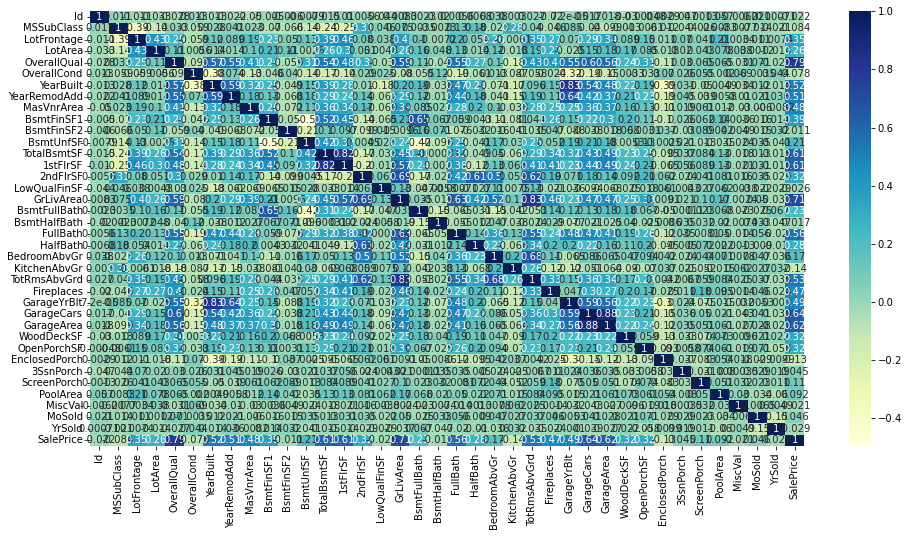

In [6]:
# Heatmap for further visualization

hsg_data_numeric = hsg_data.select_dtypes(include=['float64', 'int64'])


plt.figure(figsize=(16,8))
cor = hsg_data_numeric.corr()
cor

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()



#### From the graph it can be seen that there are several parameters that are positively correlating with price.

In [7]:
hsg_data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

###   Inferences from reading the data
- There are total of 80 independent variables and 1 dependent variable ('Sale Price')
- Total number of records is 1460
- 19 out of 80 independent variables have blank/null inputs
- 43 out of 80 independent variables are non-numeric / categorical variables
- Sale Price varies from 34,900 to 755,000 dollars with a mean price of 180,921 dollars

Columns with Null Items

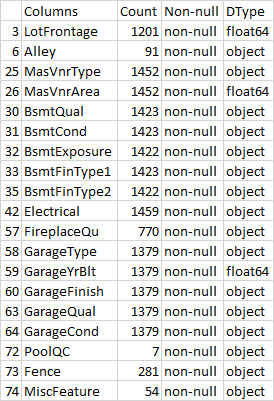

## Step 2 Data Cleaning
#### Further exploration and data cleaning

In [8]:
#  Column PoolQC has only 7 non-null items.  Lets see if this column is of any significance

print(hsg_data[hsg_data.PoolQC.notnull()])
print(hsg_data[hsg_data.PoolArea != 0])

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
197    198          75       RL        174.0    25419   Pave   NaN      Reg   
810    811          20       RL         78.0    10140   Pave   NaN      Reg   
1170  1171          80       RL         76.0     9880   Pave   NaN      Reg   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   
1386  1387          60       RL         80.0    16692   Pave   NaN      IR1   
1423  1424          80       RL          NaN    19690   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
197          Lvl    AllPub  ...      512     Ex  GdPrv         NaN       0   
810          Lvl    AllPub  ...      648     Fa  GdPrv         NaN       0   
1170         Lvl    AllPub  ...      576     Gd  GdPrv         NaN       0   
1182         Lvl    AllPub  ...      555     Ex  MnPrv 

#### It can be seen that PoolQC is filled only for those properties which has a non-zero PoolArea.  Looking at the data, it appears Sale Price doesn't get influenced by PoolQC.  However, we will keep it for further analysis by filling the null items with "Na"

In [9]:
hsg_data.PoolQC = hsg_data.PoolQC.fillna("NA")
hsg_data.PoolQC.describe()

count     1460
unique       4
top         NA
freq      1453
Name: PoolQC, dtype: object

In [10]:
#  Column Electrical has one null item. We will explore it

hsg_data.Electrical.describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [11]:
# SBrkr is the mode occuring 1334 times.  Hence we will fill this null item with SBrkr

hsg_data.Electrical = hsg_data.Electrical.fillna("SBrkr")
hsg_data.Electrical.describe()

count      1460
unique        5
top       SBrkr
freq       1335
Name: Electrical, dtype: object

In [12]:
#  Column M has only 54 items.  These are items that are not covered under other categories.  As per the datafile NA = None, but Pandas treats this as null value. We will modify null values to "NA"
hsg_data.MiscFeature = hsg_data.MiscFeature.fillna("NA")
hsg_data.MiscFeature.describe()

count     1460
unique       5
top         NA
freq      1406
Name: MiscFeature, dtype: object

In [13]:
#  For no garage, Pandas treats "Not Applicable" as null value. We will modify null values to "NA"
hsg_data.GarageType = hsg_data.GarageType.fillna("NA")
hsg_data.GarageYrBlt = hsg_data.GarageYrBlt.fillna("NA")
hsg_data.GarageFinish = hsg_data.GarageFinish.fillna("NA")
hsg_data.GarageQual = hsg_data.GarageQual.fillna("NA")
hsg_data.GarageCond = hsg_data.GarageCond.fillna("NA")

In [14]:
print(hsg_data.GarageType.describe())
print(hsg_data.GarageYrBlt.describe())
print(hsg_data.GarageFinish.describe())
print(hsg_data.GarageQual.describe())
print(hsg_data.GarageType.describe())

count       1460
unique         7
top       Attchd
freq         870
Name: GarageType, dtype: object
count     1460
unique      98
top         NA
freq        81
Name: GarageYrBlt, dtype: object
count     1460
unique       4
top        Unf
freq       605
Name: GarageFinish, dtype: object
count     1460
unique       6
top         TA
freq      1311
Name: GarageQual, dtype: object
count       1460
unique         7
top       Attchd
freq         870
Name: GarageType, dtype: object


In [15]:
#  For no basement, Pandas treats "Not Applicable" as null value. We will modify null values to "NA".  But non-null values are 1422 for Exposure and FinType2. Lets explore further 

hsg_data[hsg_data.BsmtExposure.isna() & hsg_data.BsmtCond.notna()][["BsmtCond","BsmtQual","BsmtExposure","BsmtFinSF1","BsmtFinType1","BsmtFinSF2","BsmtFinType2","BsmtUnfSF","TotalBsmtSF"]]

,BsmtCond,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtFinSF2,BsmtFinType2,BsmtUnfSF,TotalBsmtSF
948,TA,Gd,NaN,0,Unf,0,Unf,936,936


In [16]:
hsg_data[hsg_data.BsmtFinType2.isna() & hsg_data.BsmtCond.notna()][["BsmtCond","BsmtQual","BsmtExposure","BsmtFinSF1","BsmtFinType1","BsmtFinSF2","BsmtFinType2","BsmtUnfSF","TotalBsmtSF"]]

,BsmtCond,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtFinSF2,BsmtFinType2,BsmtUnfSF,TotalBsmtSF
332,TA,Gd,No,1124,GLQ,479,NaN,1603,3206


In [17]:
# Lets correct these values with the mode value of corresponding columns
hsg_data.BsmtExposure[hsg_data.BsmtExposure.isna() & hsg_data.BsmtCond.notna()] = str(hsg_data.BsmtExposure.mode())
hsg_data.BsmtExposure[948]

'0    No\ndtype: object'

In [18]:
hsg_data.BsmtFinType2[hsg_data.BsmtFinType2.isna() & hsg_data.BsmtCond.notna()] = str(hsg_data.BsmtFinType2.mode())
hsg_data.BsmtFinType2[332]


'0    Unf\ndtype: object'

In [19]:
hsg_data.BsmtQual = hsg_data.BsmtQual.fillna("NA")
hsg_data.BsmtCond = hsg_data.BsmtCond.fillna("NA")
hsg_data.BsmtFinType1 = hsg_data.BsmtFinType1.fillna("NA")
hsg_data.BsmtFinType2 = hsg_data.BsmtFinType2.fillna("NA")
hsg_data.BsmtExposure = hsg_data.BsmtExposure.fillna("NA")

In [20]:
print(hsg_data.BsmtQual.describe())
print(hsg_data.BsmtCond.describe())
print(hsg_data.BsmtFinType1.describe())
print(hsg_data.BsmtFinType2.describe())
print(hsg_data.BsmtExposure.describe())

count     1460
unique       5
top         TA
freq       649
Name: BsmtQual, dtype: object
count     1460
unique       5
top         TA
freq      1311
Name: BsmtCond, dtype: object
count     1460
unique       7
top        Unf
freq       430
Name: BsmtFinType1, dtype: object
count     1460
unique       8
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object
count     1460
unique       6
top         No
freq       953
Name: BsmtExposure, dtype: object


In [21]:
#  For no fence, Pandas treats "No Fence" as null value. We will modify null values to "NA"
hsg_data.Fence = hsg_data.Fence.fillna("NA")
hsg_data.Fence.describe()

count     1460
unique       5
top         NA
freq      1179
Name: Fence, dtype: object

In [22]:
#  For no fireplace, Pandas treats "No Fireplace" as null value. We will modify null values to "NA"
hsg_data.FireplaceQu = hsg_data.FireplaceQu.fillna("NA")
hsg_data.FireplaceQu.describe()

count     1460
unique       6
top         NA
freq       690
Name: FireplaceQu, dtype: object

In [23]:
# For Masonry, we will fill the missing values with the mode of corresponding columns

hsg_data.MasVnrType.mode(),hsg_data.MasVnrArea.mode()

(0    None
 dtype: object,
 0    0.0
 dtype: float64)

In [24]:
hsg_data.MasVnrType = hsg_data.MasVnrType.fillna("None")
hsg_data.MasVnrType.describe()

count     1460
unique       4
top       None
freq       872
Name: MasVnrType, dtype: object

In [25]:
hsg_data.MasVnrArea = hsg_data.MasVnrArea.fillna(float("0.0"))
hsg_data.MasVnrArea.describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [26]:
# In similar lilnes, for Alley, we will fill the missing values with the "NA"
hsg_data.Alley = hsg_data.Alley.fillna("None")
hsg_data.Alley.describe()

count     1460
unique       3
top       None
freq      1369
Name: Alley, dtype: object

In [27]:
# For lotFrontage considering that there are properties that doesn't have direct access to street,  we will fill these null values with "0.0"

hsg_data.LotFrontage = hsg_data.LotFrontage.fillna(float("0.0"))
hsg_data.LotFrontage

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [28]:
hsg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [29]:
# Convert MSSubClass into categorical variable

hsg_data['MSSubClass'] = hsg_data['MSSubClass'].astype('object')

### Now we need to convert all the categorical data 

#### Introducing new columns for each category using dummies

In [30]:
for i in list(hsg_data.select_dtypes(include=object).columns):
    status = pd.get_dummies(hsg_data[i],drop_first = True)
    hsg_data = pd.concat([hsg_data, status], axis=1)
    hsg_data.drop([i],axis=1,inplace = True)

In [31]:
hsg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 372 entries, Id to Partial
dtypes: float64(2), int64(34), uint8(336)
memory usage: 889.8 KB


In [32]:
col_list = list(hsg_data.columns)

In [33]:
col_list.remove("SalePrice")

In [34]:
col_list

['Id',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 30,
 40,
 45,
 50,
 60,
 70,
 75,
 80,
 85,
 90,
 120,
 160,
 180,
 190,
 'FV',
 'RH',
 'RL',
 'RM',
 'Pave',
 'None',
 'Pave',
 'IR2',
 'IR3',
 'Reg',
 'HLS',
 'Low',
 'Lvl',
 'NoSeWa',
 'CulDSac',
 'FR2',
 'FR3',
 'Inside',
 'Mod',
 'Sev',
 'Blueste',
 'BrDale',
 'BrkSide',
 'ClearCr',
 'CollgCr',
 'Crawfor',
 'Edwards',
 'Gilbert',
 'IDOTRR',
 'MeadowV',
 'Mitchel',
 'NAmes',
 'NPkVill',
 'NWAmes',
 'NoRidge',
 'NridgHt',
 'OldTown',
 'SWISU',
 'Sawyer',
 'SawyerW',
 'Somerst',
 

## Step 3 : Data Preparation
### Preparing Data for Building Model

In [35]:
X = hsg_data.loc[:, col_list] # predictors in variable X

y = hsg_data['SalePrice'] # response variable in Y


In [36]:
# Scaling Features 

from sklearn.preprocessing import scale
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index([          'Id',  'LotFrontage',      'LotArea',  'OverallQual',
        'OverallCond',    'YearBuilt', 'YearRemodAdd',   'MasVnrArea',
         'BsmtFinSF1',   'BsmtFinSF2',
       ...
              'ConLI',        'ConLw',          'New',          'Oth',
                 'WD',      'AdjLand',       'Alloca',       'Family',
             'Normal',      'Partial'],
      dtype='object', length=917)

In [37]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Step 4 : Model Building

### Linear Regression Model

In [38]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [39]:
print(lm.intercept_)
print(lm.coef_)

5333236567046051.0
[ 1.42527476e+02  1.36755694e+03  8.08974953e+03  8.71433573e+03
  6.53075126e+03  1.32531244e+04  2.26714469e+03  3.92647066e+03
 -1.16337016e+17 -4.11477337e+16 -1.12707078e+17  1.11900640e+17
  7.91167103e+16  8.93372718e+16  9.95090602e+15 -1.07541640e+17
  1.20000000e+03 -4.06000000e+02  8.08125000e+02 -1.56150000e+03
 -3.13300000e+03 -5.49862500e+03 -1.32600000e+03  3.26200000e+03
  4.16800000e+03  2.04600000e+03  1.62978320e+03  2.10062500e+03
  1.57950000e+03  7.66250000e+02  1.07237500e+03  1.95490250e+05
  6.29237500e+03 -1.40175000e+03 -1.96915625e+03  9.73750000e+02
 -7.26500000e+02 -2.78250000e+02  1.75825000e+03  4.64362500e+03
  1.43000000e+02 -1.32725000e+03  1.33493750e+03 -1.24650000e+03
  4.06389523e+17 -2.51225000e+03  8.60000000e+01  4.34000000e+02
  5.40453335e+16  4.07100000e+03  3.17350000e+03  9.98400000e+03
  7.02950000e+03  6.62773055e+16  1.63655058e+16 -3.42318055e+16
  4.89090791e+16 -6.62773055e+16 -1.63655058e+16 -1.19500000e+02
  5.08

In [40]:
from sklearn.metrics import r2_score, mean_squared_error

In [41]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9529700649175614
-7.757260468309915e+24
300083850320.0
2.186548728321635e+37
293911704.52497554
4.99212038429597e+34


#### The test set R2 value is entirely off the radar.  The model needs to be checked for validity. 

### Ridge and Lasso Regression
##### Let's now try predicting sales prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

In [42]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [43]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [44]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.64808403e+02  8.14587072e+02  3.32766840e+03  5.89221803e+03
  2.92608223e+03  1.46374275e+03  2.33818692e+03  3.88567453e+03
  3.82778392e+03  6.08984494e+02  1.22080534e+03  5.43307610e+03
  6.04473404e+03  4.32562958e+03 -1.20781683e+03  7.92865486e+03
  1.70903643e+03 -4.85179387e+02  3.30273552e+03  1.41401235e+03
  6.69892662e+02 -1.52990986e+03  3.68419406e+03  1.88612303e+03
  2.96964210e+03  3.43694536e+03  1.58801057e+03  1.48080692e+03
 -6.40710099e+02  7.33976566e+02  6.12564745e+02  8.27592138e+02
  1.77133609e+02 -1.78044075e+02 -6.75781553e+02 -8.33220961e+02
  9.70060452e+01  1.11026404e+02  3.90174885e+02  1.36003037e+03
  5.88228814e+02 -3.44770264e+02 -7.32962653e+02 -4.18415408e+02
 -9.74484581e+02 -1.48788066e+03 -1.20986372e+03 -4.63598204e+02
 -1.05114505e+03  6.11132400e+02  1.18525442e+02  1.15331904e+03
 -8.16152350e+02  4.39226377e+02  2.40728290e+02  4.14584977e+02
  1.72682398e+02  4.39226377e+02  2.40728290e+02  1.52380545e+02
 -1.93540240e+01 -2.54682

In [45]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9326114641079967
0.6858512805908459
429985950064.62305
885494931792.0895
421141968.72147214
2021677926.4659576


####  One more iteration with parameters around 500 for futher tuning

In [46]:
params = {'alpha': [250, 350, 500, 650, 800, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [250, 350, 500, 650, 800, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [47]:
print(model_cv.best_params_)

{'alpha': 350}


In [48]:
alpha = 350
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.03183723e+02  7.67185107e+02  3.71384431e+03  6.37150374e+03
  3.41191400e+03  1.80231147e+03  2.52695225e+03  4.10265586e+03
  4.36594219e+03  7.41699786e+02  1.24367654e+03  6.06440766e+03
  6.61506946e+03  4.98404525e+03 -1.47820182e+03  8.87018362e+03
  1.81765428e+03 -5.49499915e+02  3.45970940e+03  1.27895424e+03
  3.29533387e+02 -1.83104785e+03  3.59762396e+03  2.02797988e+03
  3.02967989e+03  3.55729876e+03  1.57075028e+03  1.53891196e+03
 -7.10169092e+02  7.73665850e+02  6.22113266e+02  9.30810172e+02
  1.69013297e+02 -2.41649696e+02 -8.06934447e+02 -7.94832592e+02
  1.24300268e+02  9.52186858e+01  4.03987167e+02  1.37680309e+03
  4.72095207e+02 -4.70517780e+02 -7.25366285e+02 -4.96731358e+02
 -1.09279355e+03 -1.50074059e+03 -1.28184222e+03 -4.53367532e+02
 -1.15778521e+03  6.15678025e+02  1.40712090e+02  1.27777098e+03
 -6.63314598e+02  4.76569222e+02  2.80454312e+02  4.68687984e+02
  2.65852208e+02  4.76569222e+02  2.80454312e+02  9.94828626e+01
  5.24746596e+01 -8.55581

In [49]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9395626619752888
0.6547337485369079
385632450177.86414
973206309306.102
377700734.7481529
2221932213.0276303


Still the test data predictions are far off

### Let's work with Lasso 

In [50]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [51]:
print(model_cv.best_params_)

{'alpha': 500}


In [52]:
alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500)

In [53]:
lasso.coef_

array([-0.00000000e+00,  6.26591464e+02,  4.13148002e+03,  1.10609977e+04,
        5.51001854e+03,  9.29300827e+03,  3.15655165e+03,  3.85288464e+03,
        6.75678904e+03,  0.00000000e+00, -0.00000000e+00,  9.93465689e+03,
        0.00000000e+00,  0.00000000e+00, -2.49654331e+03,  3.24748642e+04,
        1.18340776e+03, -5.80060329e+01,  9.14429508e+02, -0.00000000e+00,
       -2.44654346e+03, -4.48482594e+03,  0.00000000e+00,  7.46933300e+02,
        2.79060615e+03,  2.21655102e+03,  5.89250775e+02,  8.32821990e+02,
       -0.00000000e+00,  2.35648238e+02,  4.75436019e+00,  5.45948789e+03,
        0.00000000e+00, -1.73883870e+01, -6.96553930e+01,  1.32954085e+02,
        8.40610346e+01,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -5.28059578e+02, -0.00000000e+00, -0.00000000e+00,
       -8.91666980e+02, -1.67031548e+03, -1.98122059e+03, -0.00000000e+00,
       -9.79225941e+02,  0.00000000e+00,  0.00000000e+00,  1.61413026e+03,
       -0.00000000e+00,  

In [54]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9436243125166998
0.5349333134386924
359716281444.38794
1310889296858.8625
352317611.6007717
2992897938.0339327


In [55]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.529701e-01,9.395627e-01,9.436243e-01
1,R2 Score (Test),-7.757260e+24,6.547337e-01,5.349333e-01
2,RSS (Train),3.000839e+11,3.856325e+11,3.597163e+11
3,RSS (Test),2.186549e+37,9.732063e+11,1.310889e+12
4,MSE (Train),1.714385e+04,1.943452e+04,1.877013e+04
5,MSE (Test),2.234305e+17,4.713738e+04,5.470738e+04


###  Lets observe the changes in the coefficients after regularization

In [56]:
betas = pd.DataFrame(index=X.columns)

In [57]:
betas.rows = X.columns

In [58]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [66]:
pd.set_option('display.max_rows', None)
betas.head(1000)

,Linear,Ridge,Lasso
Id,1.425275e+02,-3.383172e+02,-0.000000
LotFrontage,1.367557e+03,9.012614e+02,386.423019
LotArea,8.089750e+03,2.611438e+03,3491.914920
OverallQual,8.714336e+03,4.900926e+03,13539.899188
OverallCond,6.530751e+03,2.007757e+03,4588.893245
YearBuilt,1.325312e+04,1.062053e+03,8641.809313
YearRemodAdd,2.267145e+03,1.935317e+03,3570.605139
MasVnrArea,3.926471e+03,3.347036e+03,3052.425044
BsmtFinSF1,-1.163370e+17,2.909706e+03,6551.911970
BsmtFinSF2,-4.114773e+16,4.013171e+02,0.000000


#### Testing with doubling the Alpha Value

In [60]:
# Test with doubling the Alpha Value
alpha = 1000
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-3.38317222e+02  9.01261416e+02  2.61143796e+03  4.90092580e+03
  2.00775667e+03  1.06205284e+03  1.93531722e+03  3.34703556e+03
  2.90970554e+03  4.01317080e+02  1.10223490e+03  4.28281216e+03
  4.87679439e+03  3.31114468e+03 -7.04828179e+02  6.27320620e+03
  1.42658013e+03 -3.32031437e+02  2.87699129e+03  1.50846443e+03
  1.12706514e+03 -1.00628609e+03  3.55870724e+03  1.58737537e+03
  2.74312602e+03  3.09595706e+03  1.54452361e+03  1.33199123e+03
 -4.57285474e+02  6.19308690e+02  5.72561326e+02  6.44997238e+02
  1.78134654e+02 -8.23804408e+01 -4.31414610e+02 -8.62553991e+02
  2.06771947e+01  8.54472499e+01  2.66068469e+02  1.31694419e+03
  6.80914840e+02 -1.48784972e+02 -7.04486772e+02 -3.10807705e+02
 -6.99053455e+02 -1.35854918e+03 -1.07136300e+03 -4.56108975e+02
 -8.06811556e+02  5.36317909e+02  9.88474526e+01  9.97340947e+02
 -9.76078551e+02  3.73192223e+02  1.51361763e+02  3.19810029e+02
 -4.16721151e+01  3.73192223e+02  1.51361763e+02  2.58058930e+02
 -1.70496709e+02 -5.07528

In [62]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric4.append(mse_test_lr**0.5)

0.9112518739786113
0.7362939161416341
566275061160.5144
743311642901.1882
554627875.7693579
1697058545.4365027


In [63]:
alpha =1000

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=1000)

In [64]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric4.append(mse_test_lr**0.5)

0.9290790544569099
0.5654340655321412
452525192084.5741
1224916444747.9497
443217622.0221098
2796612887.552397


In [65]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(100)

,Linear,Ridge,Lasso
Id,1.425275e+02,-338.317222,-0.000000
LotFrontage,1.367557e+03,901.261416,386.423019
LotArea,8.089750e+03,2611.437960,3491.914920
OverallQual,8.714336e+03,4900.925795,13539.899188
OverallCond,6.530751e+03,2007.756675,4588.893245
YearBuilt,1.325312e+04,1062.052840,8641.809313
YearRemodAdd,2.267145e+03,1935.317219,3570.605139
MasVnrArea,3.926471e+03,3347.035560,3052.425044
BsmtFinSF1,-1.163370e+17,2909.705536,6551.911970
BsmtFinSF2,-4.114773e+16,401.317080,0.000000


### Doubling the alpha value, the train data R2 value is reduced slightly, but test data R2 has increased significantly.